# Question:

Tasks to be performed:
1. Read the dataset.
2. Check the datatype of all the columns.
3. Find the summary of all the numerical columns and write your findings about it.
4. The average person kills how many players?
5. 99% of people have how many kills?
6. The most kills ever recorded are how much?
7. Print all the columns of the dataframe.
8. Comment on distribution of the match's duration. Use seaborn.
9. Comment on distribution of the walk distance. Use seaborn.
10. Plot distribution of the match's duration vs walk distance one below the other.
11. Plot distribution of the match's duration vs walk distance side by side.
12. Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups.
13. How many unique values are there in 'matchType' and what are their counts?
14. Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.
15. Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences.
16. Find the Categorical columns.
17. Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.
18. Plot a boxplot of ‘matchType’ vs ‘matchDuration’. Write your inferences.
19. Change the orientation of the above plot to horizontal.
20. Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills,
teamKills, roadKills.
21. Round off column ‘winPlacePerc’ to 2 decimals.
22. Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean. Plot it on a histogram and comment on its distribution.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

1. Read the Dataset.

In [3]:
data = pd.read_csv("pubg_data.csv")
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,0.0,0,1470,0.0000
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0,0.0,0,0.0,0,0,132.7,2,1531,0.2222
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,3,0.0,0,0.0,0,0,3591.0,10,0,0.8571
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0,0.0,0,0.0,0,0,332.7,3,0,0.3462
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0,0.0,0,0.0,0,0,252.7,3,1557,0.0690


2. Check the datatype of all the columns.

In [4]:
data.info() # or data.dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  object 
 1   groupId          10000 non-null  object 
 2   matchId          10000 non-null  object 
 3   assists          10000 non-null  int64  
 4   boosts           10000 non-null  int64  
 5   damageDealt      10000 non-null  float64
 6   DBNOs            10000 non-null  int64  
 7   headshotKills    10000 non-null  int64  
 8   heals            10000 non-null  int64  
 9   killPlace        10000 non-null  int64  
 10  killPoints       10000 non-null  int64  
 11  kills            10000 non-null  int64  
 12  killStreaks      10000 non-null  int64  
 13  longestKill      10000 non-null  float64
 14  matchDuration    10000 non-null  int64  
 15  matchType        10000 non-null  object 
 16  maxPlace         10000 non-null  int64  
 17  numGroups    

3. Find the summary of all the numerical columns and write your findings about it.

In [5]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000
mean,0.234600,1.088500,129.211264,0.64400,0.221700,1.354000,47.663100,506.970200,0.913400,0.543800,...,0.160200,600.693584,0.004200,4.385917,0.024400,0.007700,1130.008410,3.63590,609.3440,0.469926
std,0.575149,1.703279,167.193945,1.09562,0.577046,2.629102,27.424146,627.297959,1.524117,0.701948,...,0.454045,1524.915601,0.074719,30.889620,0.171486,0.089674,1168.597983,2.42209,739.7924,0.304508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.575000,2.00000,0.0000,0.200000
50%,0.000000,0.000000,83.805000,0.00000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.350000,3.00000,0.0000,0.458300
75%,0.000000,2.000000,185.325000,1.00000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,...,0.000000,0.000575,0.000000,0.000000,0.000000,0.000000,1923.250000,5.00000,1495.0000,0.735100
max,7.000000,18.000000,3469.000000,11.00000,14.000000,31.000000,100.000000,1926.000000,35.000000,4.000000,...,5.000000,28780.000000,3.000000,971.200000,3.000000,2.000000,10490.000000,41.00000,1863.0000,1.000000


Ans:- Above summary shows mean, standard deviation, minimum, maximum and percentiles of the data.

4. The average person kills how many players?

In [6]:
data.kills.mean()

0.9134

5. 99% of people have how many kills?

In [7]:
data.kills.quantile(0.99)

7.0

6. The most kills ever recorded are how much?

In [8]:
data.kills.max()

35

7. Print all the columns of the dataframe.

In [9]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

8. Comment on distribution of the match's duration. Use seaborn.

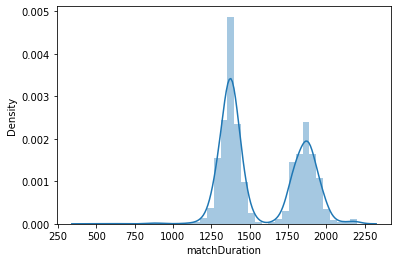

In [10]:
sns.distplot(data['matchDuration']);

Ans:- Data is a bimodal in nature i.e. there are two peaks are there at which data is distributed.

9. Comment on distribution of the walk distance. Use seaborn.

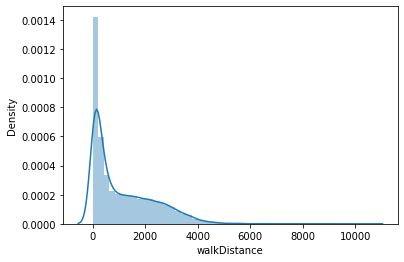

In [11]:
sns.distplot(data['walkDistance']);

Ans:- The data is skewed in nature i.e. Right skewed.
Many Players died without walking even a single step.

10. Plot distribution of the match's duration vs walk distance one below the other.

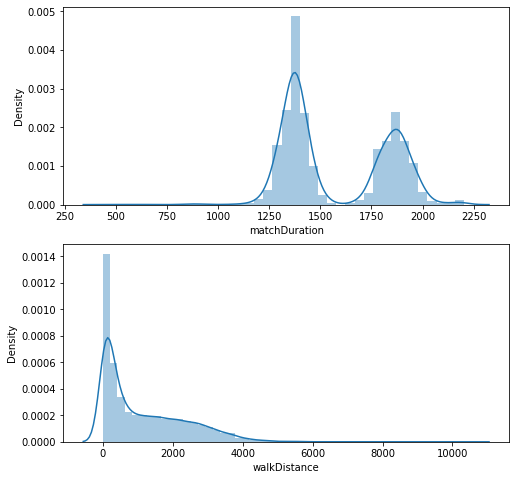

In [14]:
plt.figure(figsize=(8,8))
plt.subplot(211); 
sns.distplot(data['matchDuration']);
plt.subplot(212); 
sns.distplot(data['walkDistance']);

11. Plot distribution of the match's duration vs walk distance side by side.

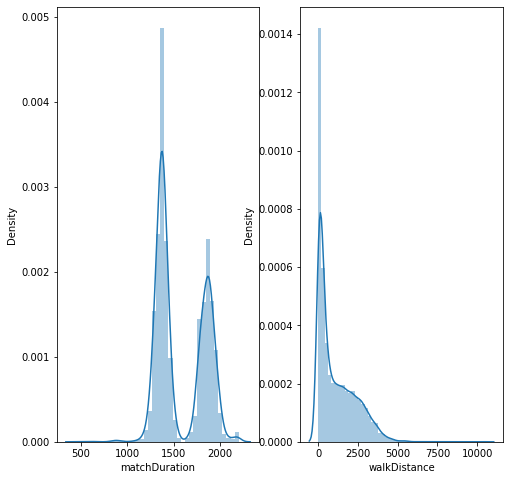

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(121); 
sns.distplot(data['matchDuration']);
plt.subplot(122); 
sns.distplot(data['walkDistance']);

12. Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups.

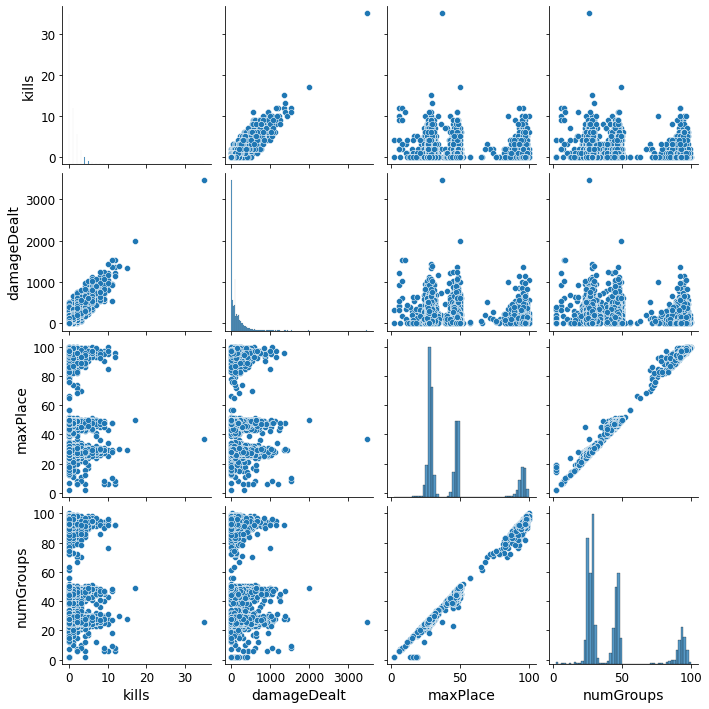

In [72]:
sns.pairplot(data[['kills', 'damageDealt', 'maxPlace', 'numGroups']]);

Ans:- Above pairplot shows the distribution of kills vs damage dealt and maxPlace vs numGroups data are linearly distributed.

Note:- Due to low Memory pairplot of whole data is not plotted.

13. How many unique values are there in 'matchType' and what are their counts?

In [16]:
data.matchType.value_counts()

squad-fpp           3969
duo-fpp             2282
squad               1359
solo-fpp            1234
duo                  702
solo                 386
normal-squad-fpp      24
crashfpp              13
normal-duo-fpp        13
normal-solo-fpp        8
normal-squad           4
flaretpp               3
crashtpp               2
flarefpp               1
Name: matchType, dtype: int64

In [18]:
data.matchType.nunique()

14

Ans:- Total 14 unique values are present in the `matchType`.

14. Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.

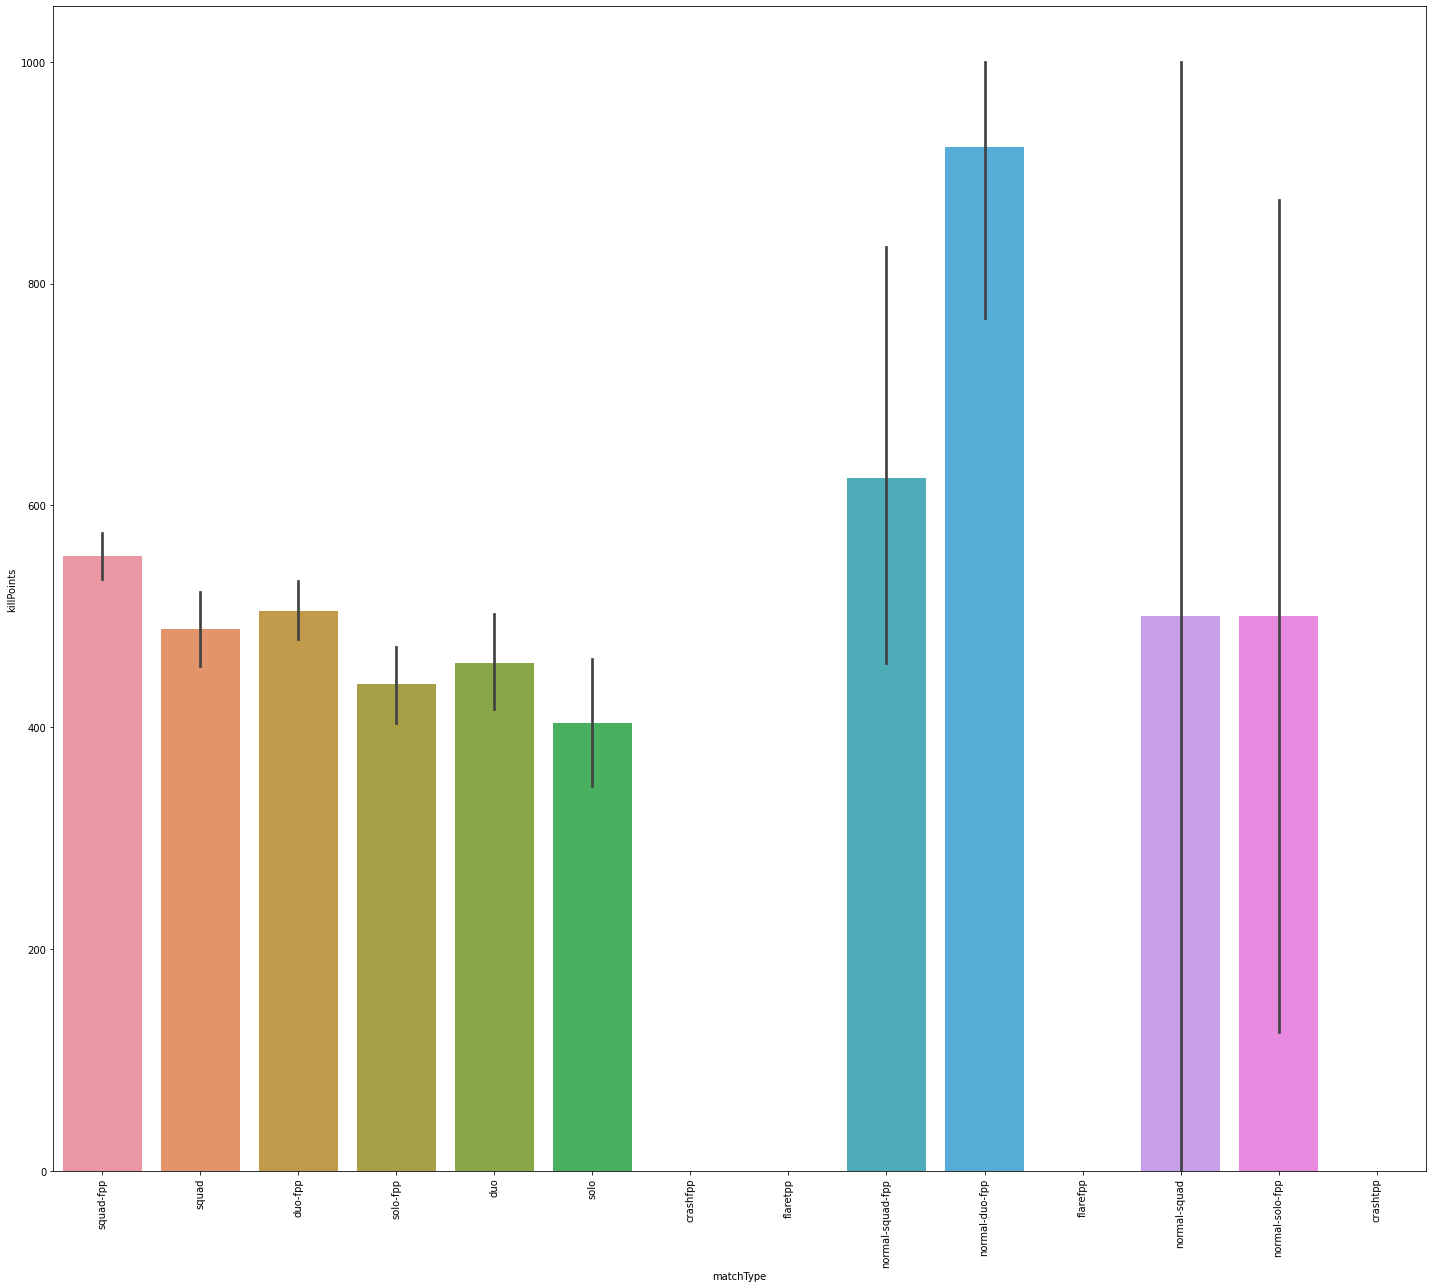

In [43]:
plt.figure(figsize=(20,18))
sns.barplot(data=data, x='matchType', y='killPoints');
plt.xticks(rotation=90)
plt.tight_layout()

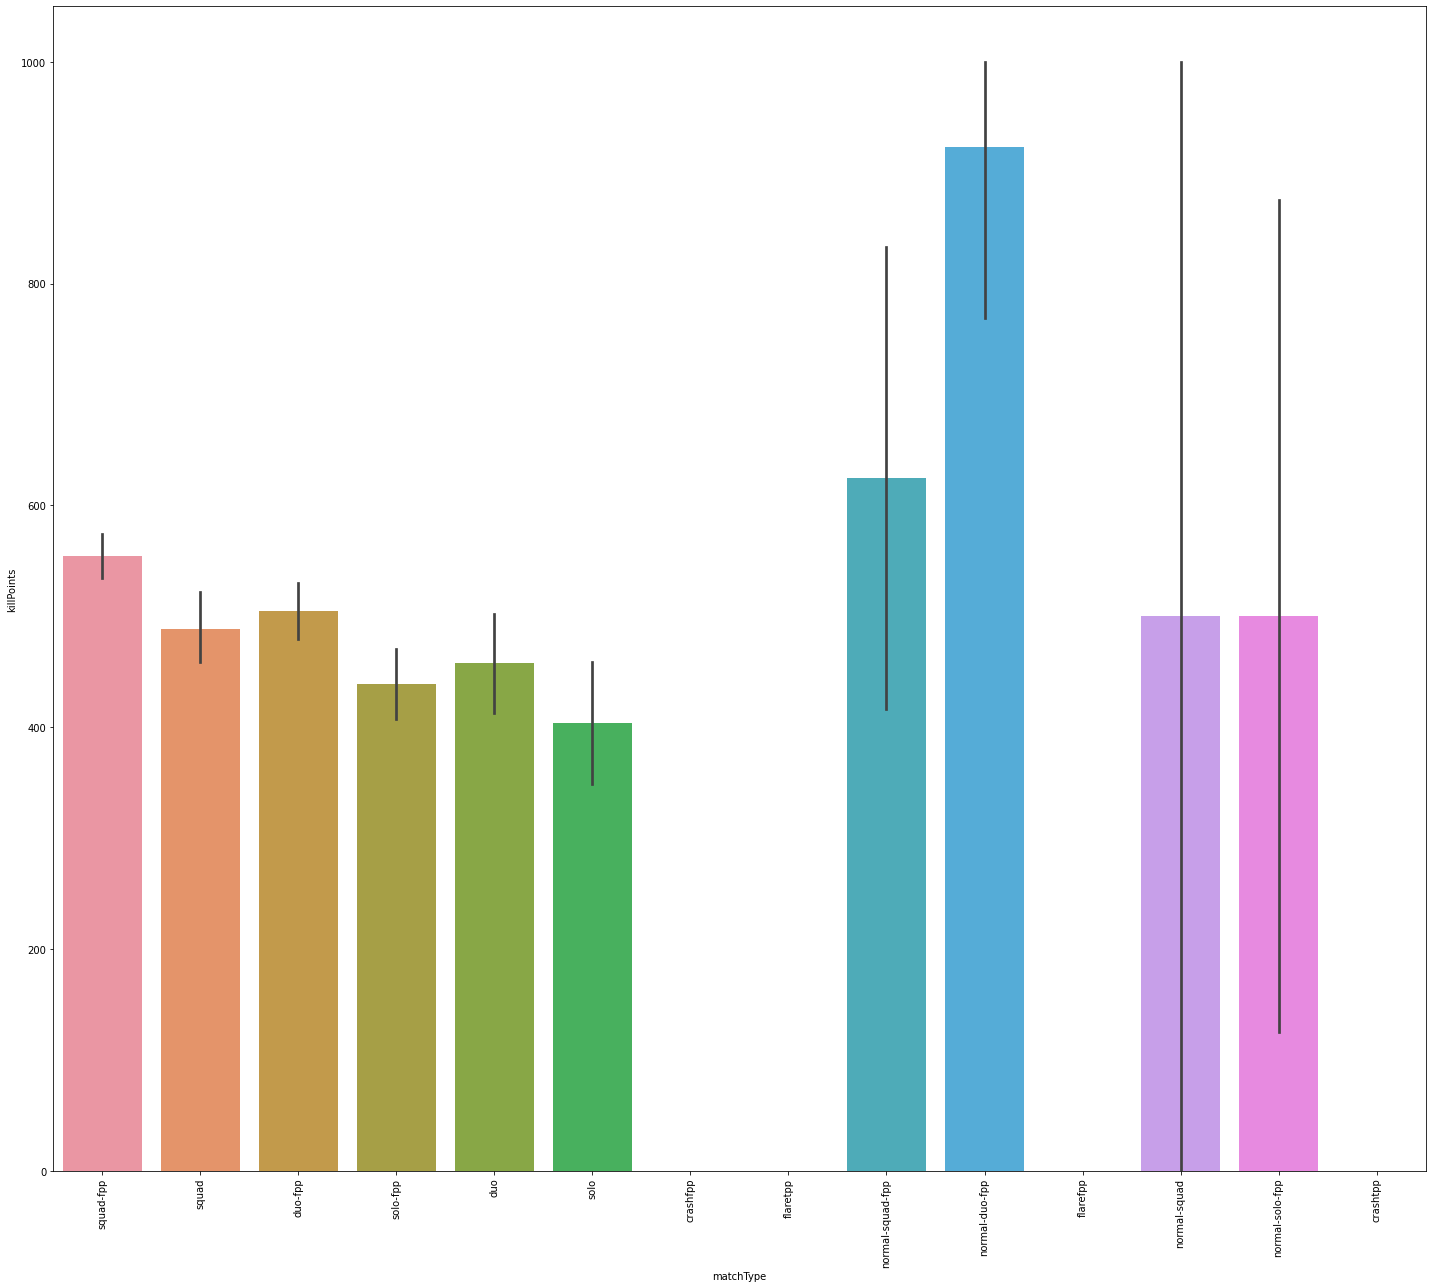

In [44]:
plt.figure(figsize=(20,18))
sns.barplot(data=data, x='matchType', y='killPoints');
plt.xticks(rotation=90)
plt.tight_layout()

Ans:- In `barplot` we can clearly see how `matchType` distributed over `killPoints` as most killPoints are from `normal-duo-fpp` which varies from 750 to 1000.

15. Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences.

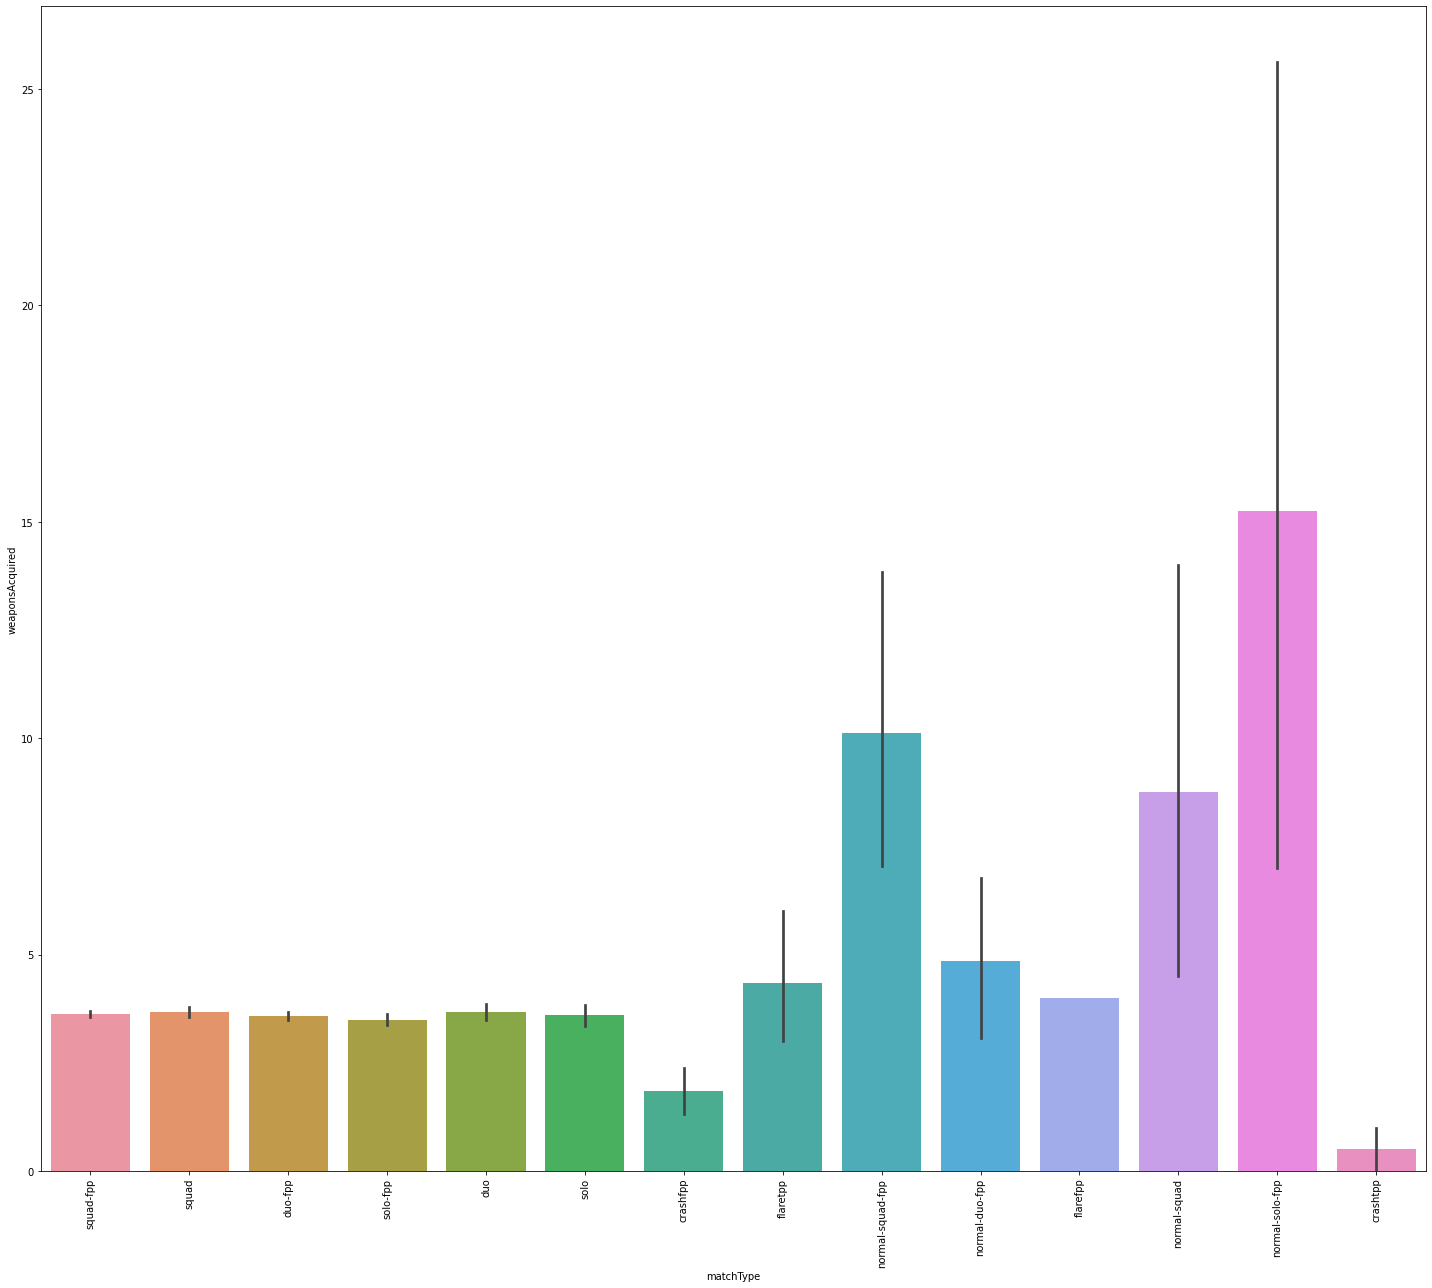

In [45]:
plt.figure(figsize=(20,18))
sns.barplot(data=data, x='matchType', y='weaponsAcquired');
plt.xticks(rotation=90)
plt.tight_layout()

Ans:- Ans:- In `barplot` we can clearly see how `matchType` distributed over `weaponAcquired` as most weapon acquired are from `normal-solo-fpp` which varies from 6 to 25.

16. Find the Categorical columns.

In [46]:
data.select_dtypes(exclude=['int64', 'float64']).columns

Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object')

17. Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.

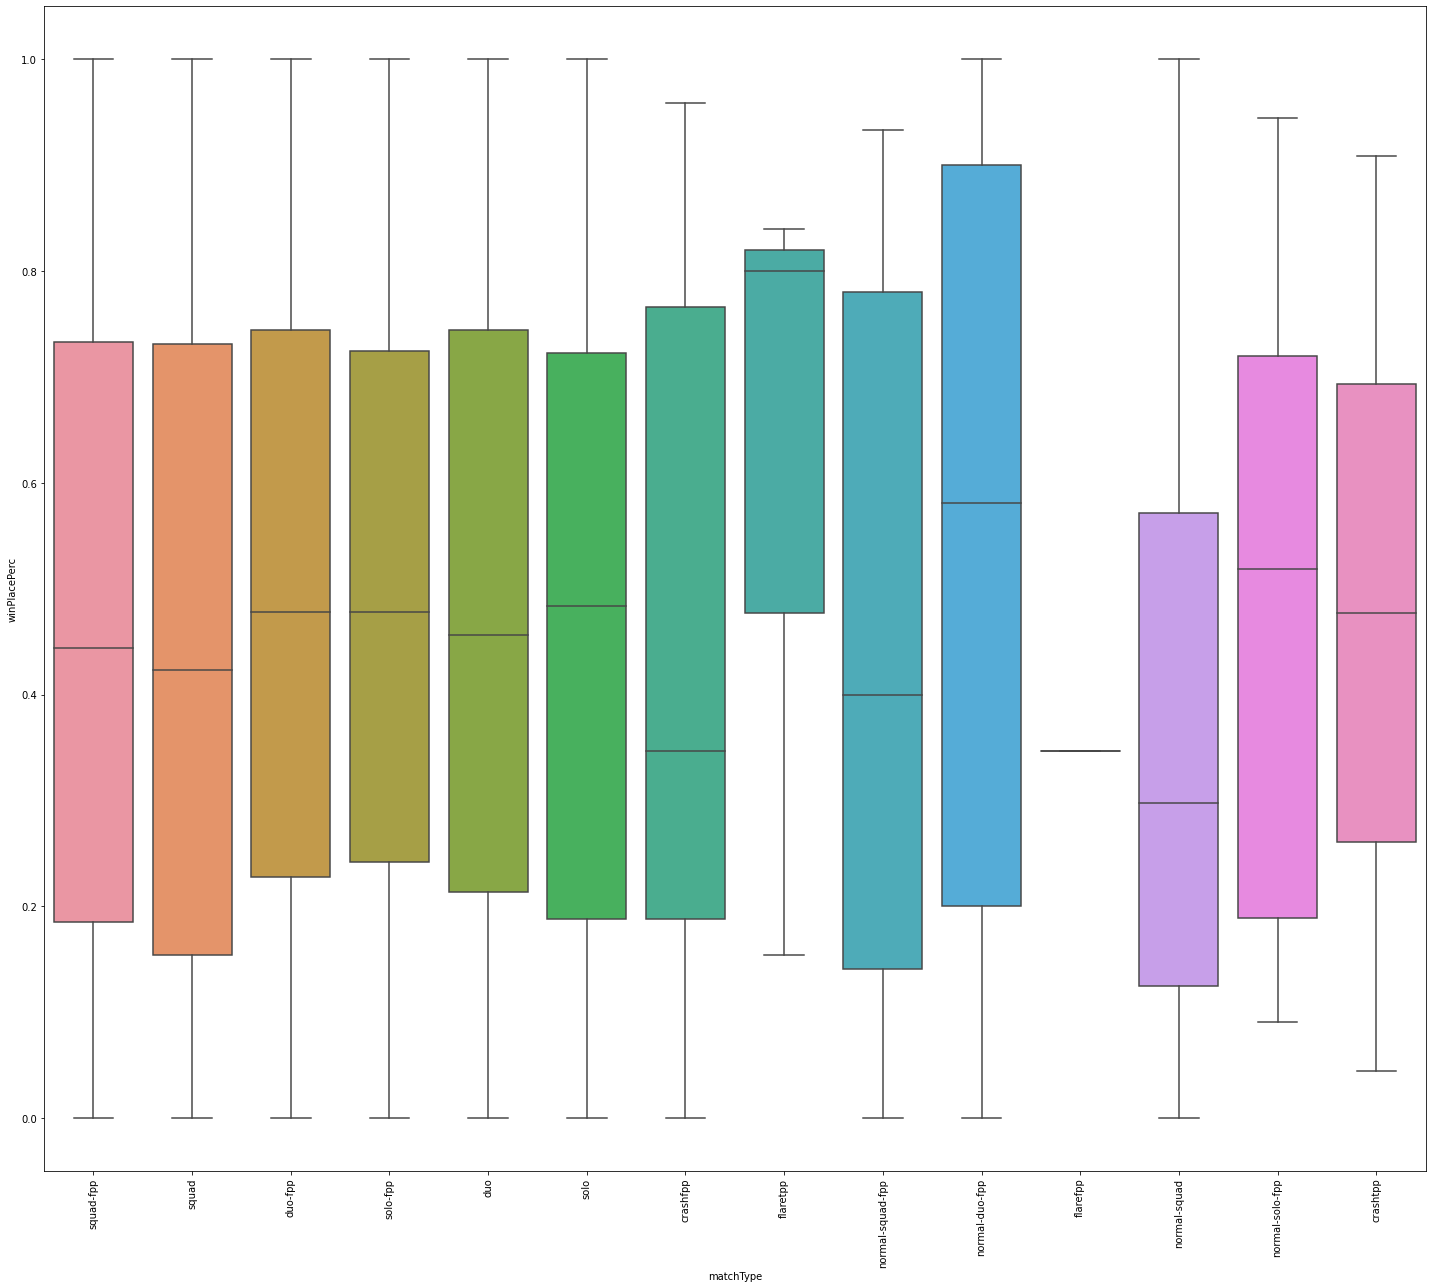

In [47]:
plt.figure(figsize=(20, 18))
sns.boxplot(x='matchType', y='winPlacePerc', data=data);
plt.xticks(rotation='vertical')
plt.tight_layout()

18. Plot a boxplot of ‘matchType’ vs ‘matchDuration’. Write your inferences.

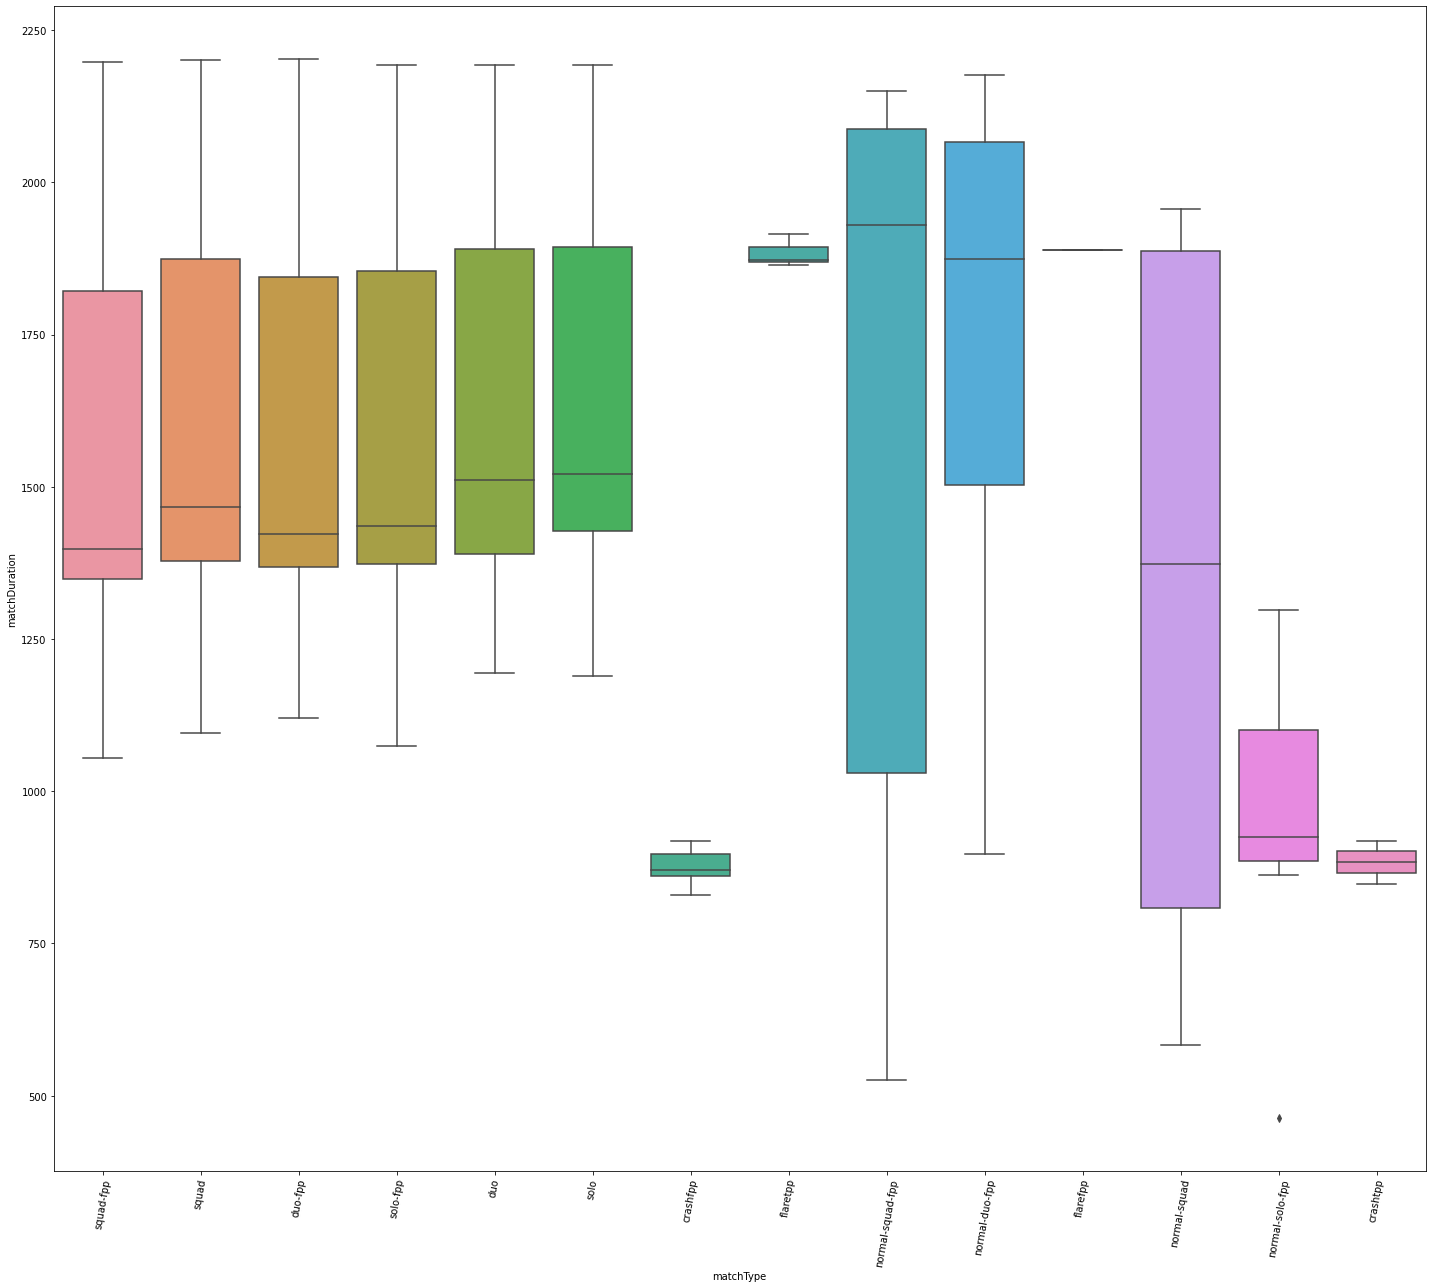

In [48]:
plt.figure(figsize=(20, 18))
sns.boxplot(x='matchType', y='matchDuration', data=data);
plt.xticks(rotation=80)
plt.tight_layout()

19. Change the orientation of the above plot to horizontal.

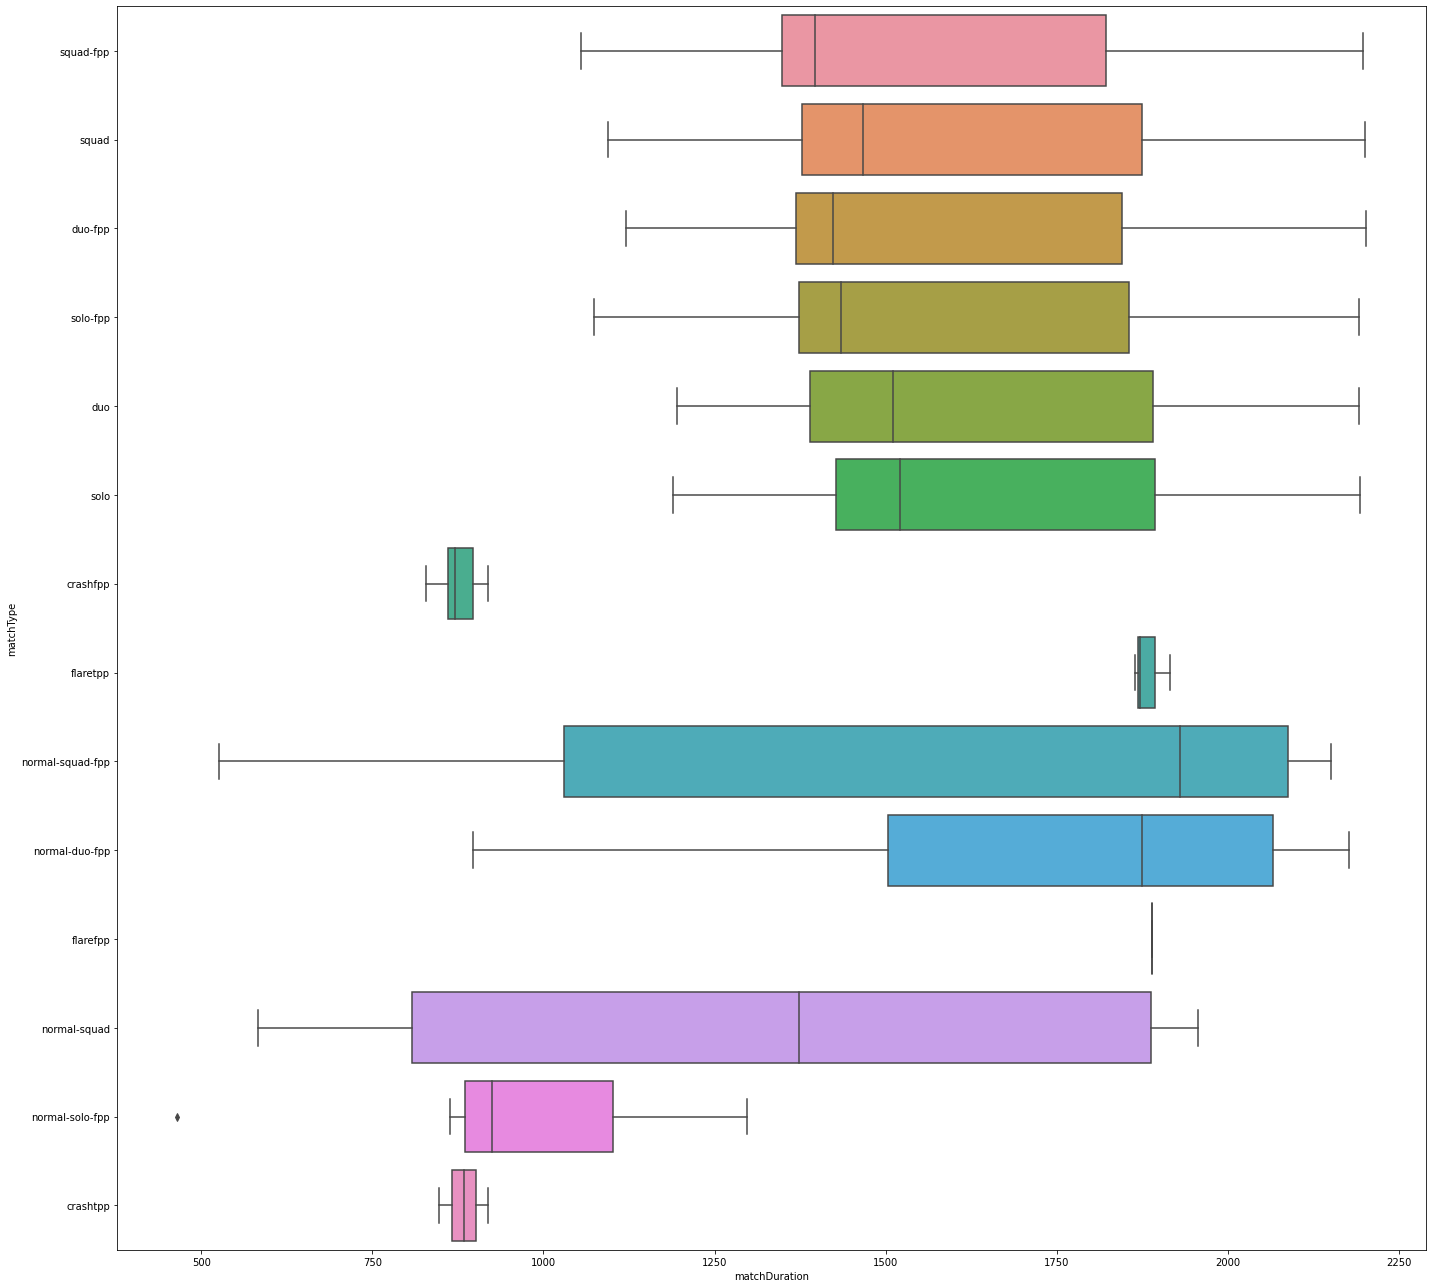

In [49]:
plt.figure(figsize=(20, 18))
sns.boxplot(y='matchType', x='matchDuration', data=data, orient='h');
plt.tight_layout()

20. Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills, teamKills, roadKills.

In [50]:
data['KILL'] = data.headshotKills+data.teamKills+data.roadKills
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,KILL
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0.0,0,0.0,0,0,0.00,0,1470,0.0000,0
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0.0,0,0.0,0,0,132.70,2,1531,0.2222,1
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,0.0,0,0.0,0,0,3591.00,10,0,0.8571,1
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0.0,0,0.0,0,0,332.70,3,0,0.3462,0
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0.0,0,0.0,0,0,252.70,3,1557,0.0690,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ef4f474acd8e85,2eca2a8391f75d,492ecdfae90b46,0,3,204.5,1,0,0,17,...,0.0,0,0.0,0,0,1648.00,4,1471,0.8333,0
9996,cf0bf82fb4d80e,2eaf2765f93adb,14bffd71e96320,0,0,0.0,0,0,0,49,...,0.0,0,0.0,0,0,897.10,6,1500,0.7174,0
9997,a0a31a0b1dcbe1,8d50c64ccc5071,147e4bbb62e3bb,0,0,0.0,0,0,0,83,...,0.0,0,0.0,0,0,188.20,2,1434,0.2083,0
9998,f6874657399d69,d31843d7e62ccb,662567dcf280f5,0,0,0.0,0,0,0,82,...,0.0,0,0.0,0,0,108.10,5,1534,0.2449,0


21. Round off column ‘winPlacePerc’ to 2 decimals.

In [51]:
data['winPlacePerc'] = round(data.winPlacePerc, 2)
data.winPlacePerc

0       0.00
1       0.22
2       0.86
3       0.35
4       0.07
        ... 
9995    0.83
9996    0.72
9997    0.21
9998    0.24
9999    0.19
Name: winPlacePerc, Length: 10000, dtype: float64

22. Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean. Plot it on a histogram and comment on its distribution.

In [52]:
a = []
for i in range(100):
    a.append(data.damageDealt.sample(frac=0.5).mean())
a

[126.78982420000024,
 128.03876833999993,
 129.3228460000003,
 128.9467124999999,
 128.59554685999964,
 129.68138149999965,
 129.26934049999997,
 129.21893545999987,
 130.41100180000012,
 127.4421781599995,
 132.00829059999998,
 131.26894139999982,
 129.0945424599997,
 127.20261669999952,
 128.54466733999996,
 131.77895569999998,
 130.28666339999984,
 129.11615256000007,
 129.0904042600001,
 130.7896327000001,
 131.85915215999984,
 127.73432755999961,
 131.53035375999974,
 129.2746748999997,
 129.65166534000002,
 129.88407075999964,
 129.6077605400001,
 129.58967323999983,
 129.07656169999993,
 127.60194733999977,
 131.52207779999966,
 131.18830299999968,
 132.23241976000034,
 128.28721589999984,
 130.2216356999998,
 128.50223673999994,
 130.04226873999994,
 128.5276181599997,
 129.11265839999987,
 129.71857696000012,
 126.97763033999989,
 131.76101533999977,
 129.8047523,
 128.89506649999993,
 128.00909814000036,
 128.94366429999957,
 131.41982953999968,
 128.0452403999998,
 129.29749

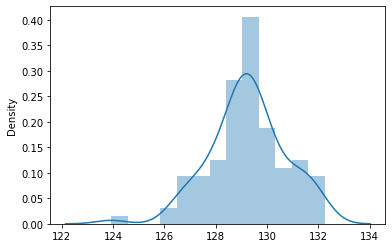

In [53]:
sns.distplot(a);